#Assignment – Model Selection
Do the following on titanic dataset


In [7]:
#Import necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. Load the dataset into python environment


In [8]:
data = pd.read_csv('/content/titanic_dataset .csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#dimension of dataset
data.shape

(891, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data['PassengerId'].nunique()

891

PassengerId is an unique value.Survived,Pclass,SibSp and Parch are int64 columns.Name,Sex,Ticket,Cabin and Embarked are objFare are float64 type columns.



In [12]:
data_original = data.copy()#Preserve a copy


In [13]:
data.drop('PassengerId',axis=1,inplace=True)#Drop unwanted column PassengerId

#Visualization

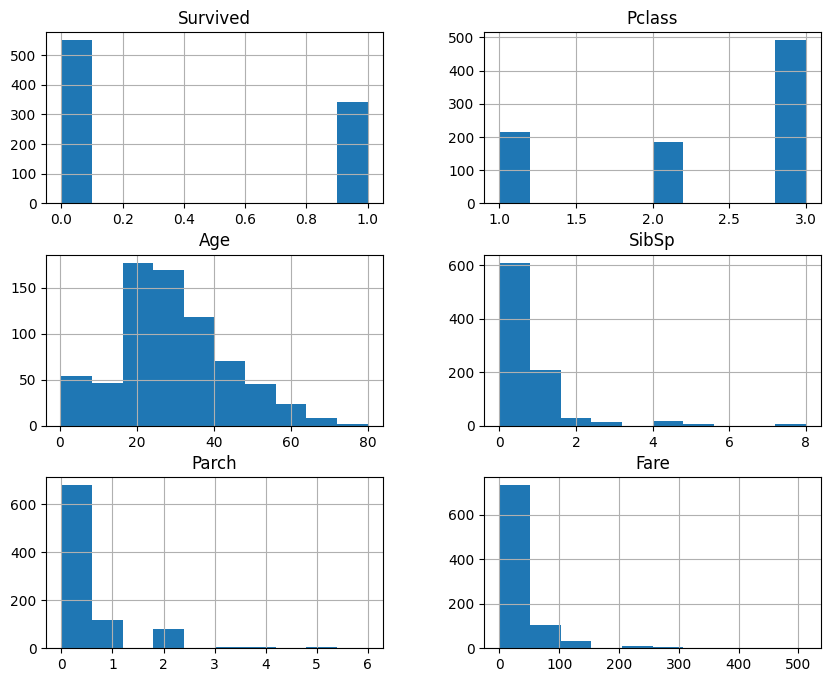

In [14]:
#Distribution of data
freqgraph = data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(10, 8))
plt.show()


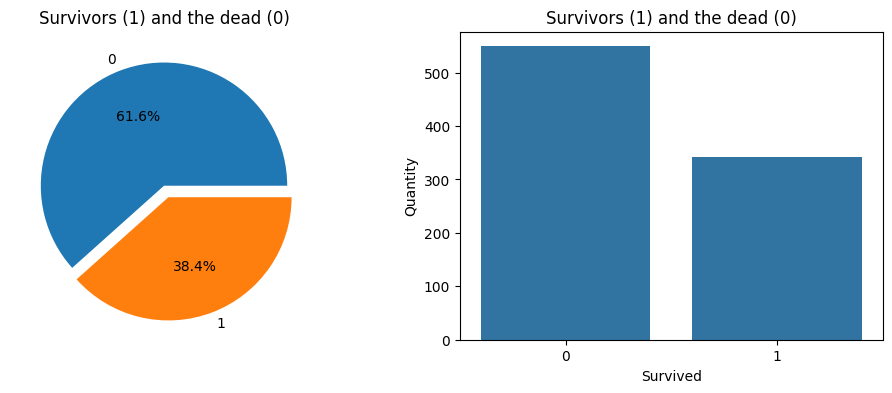

In [15]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
data['Survived'].value_counts().plot.pie(
	explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(data, x='Survived', ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()


From the above graph it is clear that not many persons survived. Only 38.4% of travellers survived.

<Axes: xlabel='Sex', ylabel='count'>

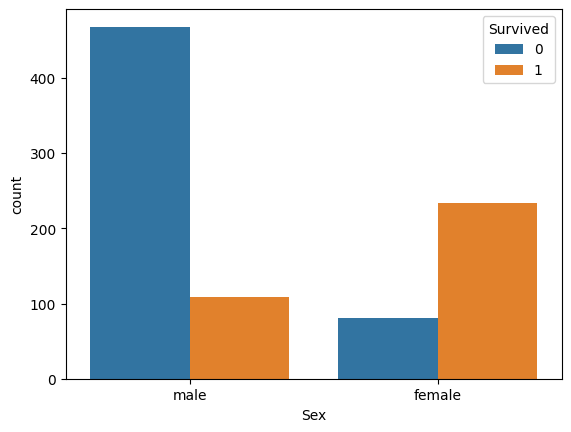

In [16]:
sns.countplot(x=data["Sex"],hue = data["Survived"],data = data)


 Most ofthe male passengers died. And out of all Female passengers, most of them survived.


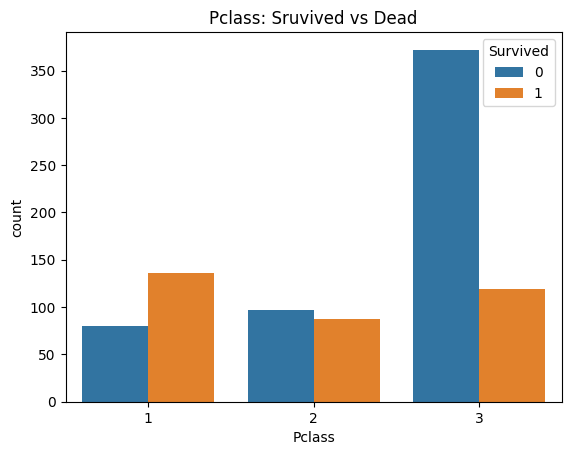

In [17]:
sns.countplot(x=data['Pclass'], hue=data['Survived'], data = data)
plt.title('Pclass: Sruvived vs Dead')
plt.show()


* In the above plot, we can see Persons who were traveling in 3rd class, most of them died or can not survived than other class passengers.
* Persons who were traveling in 2nd class, out of them almost equal number of people died and survived.
* Persons who were traveling in 1st class, out of a large number of people survived and also a fair number of persons died.


<ipython-input-18-1c01d408f6e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix= data.corr()


<Axes: >

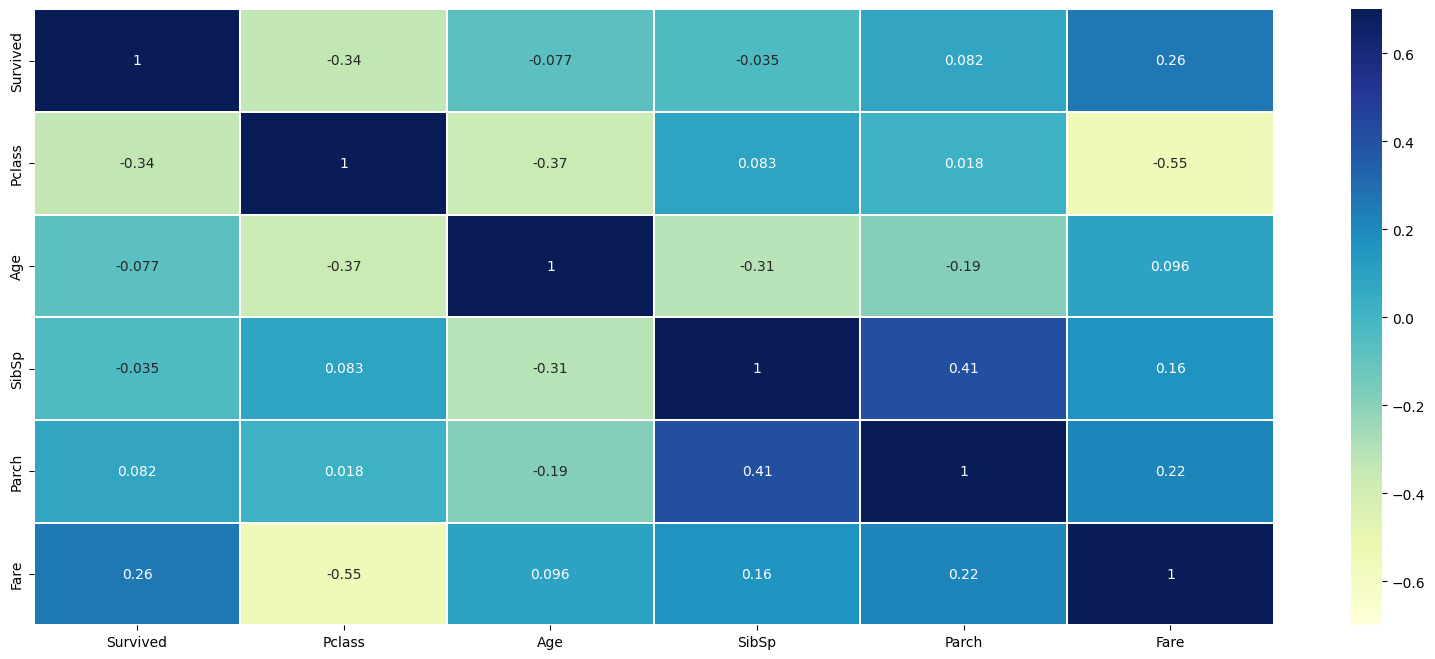

In [18]:
#Plot correlation map
corrmatrix= data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

In [19]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Handling the missing values:


In [20]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Dropping  the “Cabin” column from the data frame as it won’t be of much importance. It contains 687 null values



In [21]:
data = data.drop(columns='Cabin', axis=1)


We also see, that there are few columns, which are not of much importance in this process. Let us drop them.


In [22]:
data = data.drop(columns = ['Name','Ticket'],axis=1)


Replacing the missing values in the “Age” column with the mean value



In [23]:
data['Age'].fillna(data['Age'].mean(), inplace=True)


Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times


In [24]:
print(data['Embarked'].mode())


0    S
Name: Embarked, dtype: object


In [25]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [26]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Detect and handle outliers

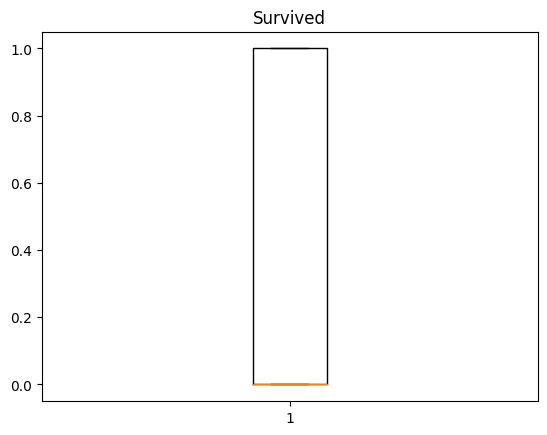

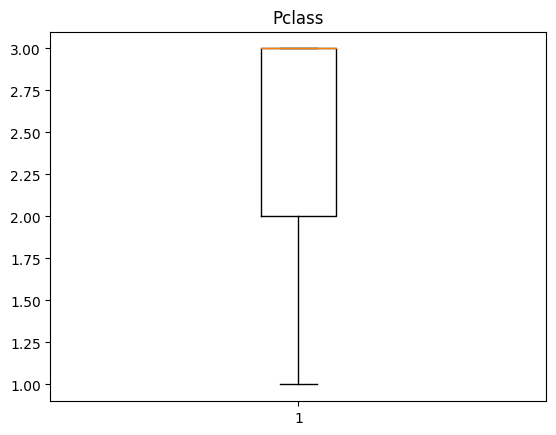

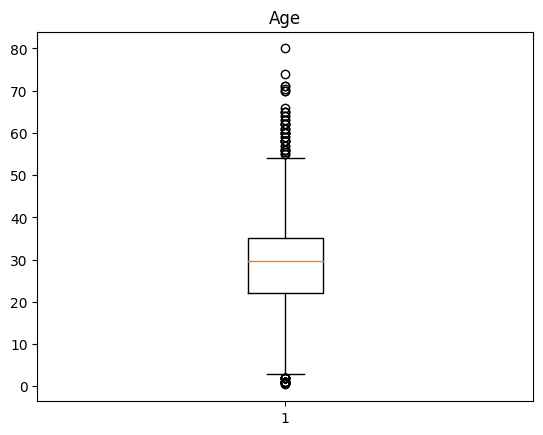

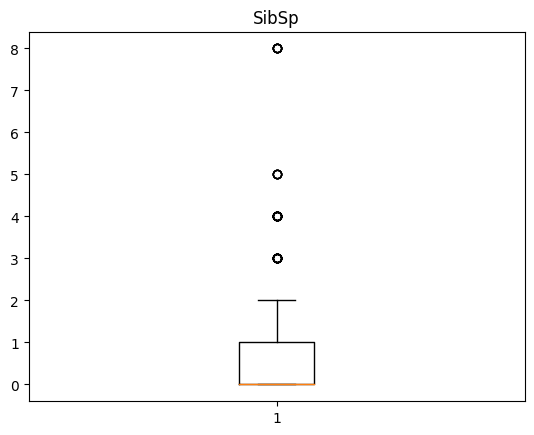

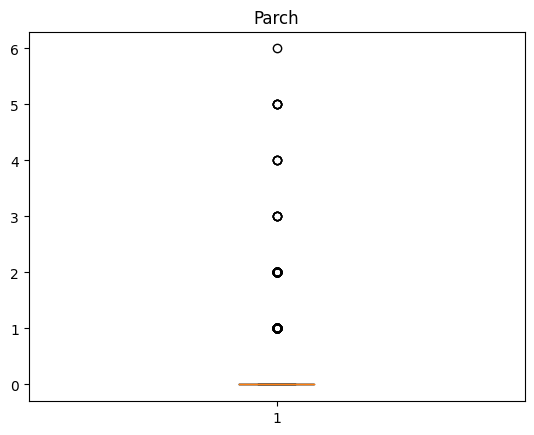

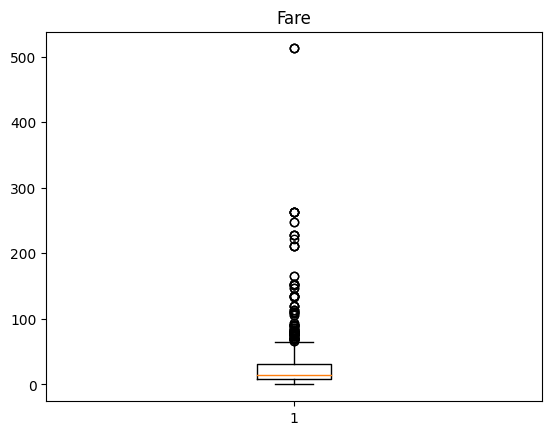

In [27]:
num_columns=data.select_dtypes(include=['float64','int64'])
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


In [28]:
num_columns = num_columns.drop(columns='Survived',axis=1)
for i in num_columns:#IQR method for handling outliers
  Q1=np.percentile(data[i],25,method='midpoint')
  Q2=np.percentile(data[i],50,method='midpoint')
  Q3=np.percentile(data[i],75,method='midpoint')
  IQR=Q3-Q1
  low_lim = Q1-1.5*IQR
  up_lim = Q3+1.5*IQR
  print("lower limit:",low_lim)
  print("upper limit:",up_lim)
  outlier=[]
  for x in data[i]:
    if(x<low_lim) or (x>up_lim):
      outlier.append(x)
  print(outlier)
  #clip method to handle
  data[i] = data[i].clip(lower=low_lim,upper=up_lim)


lower limit: 0.5
upper limit: 4.5
[]
lower limit: 2.5
upper limit: 54.5
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]
lower limit: -1.5
upper limit: 2.5
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]
lower limit: 0.0
upper limit: 0.0
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 

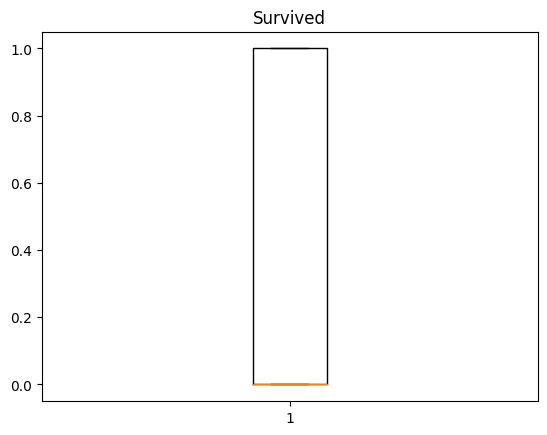

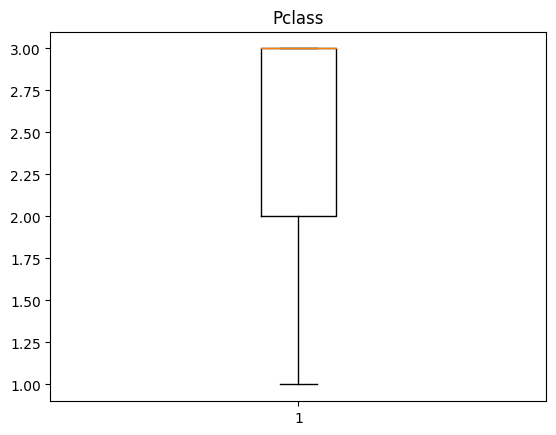

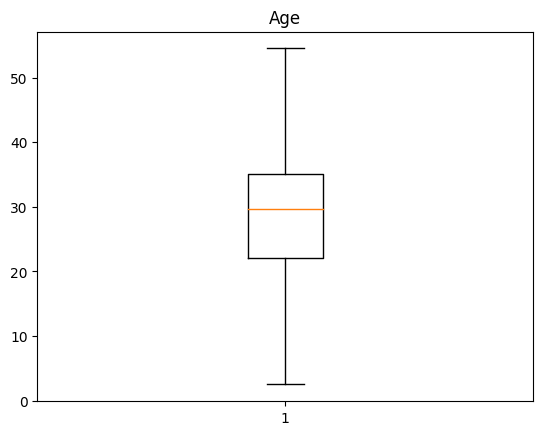

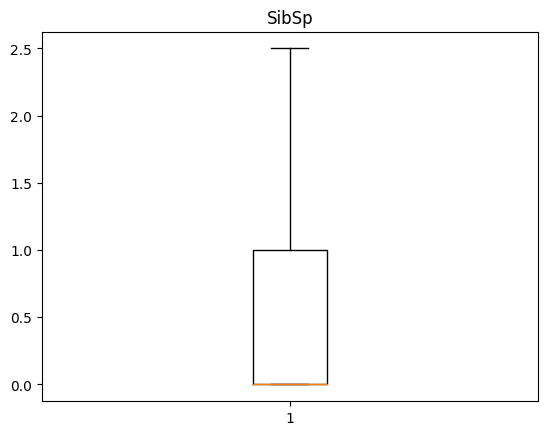

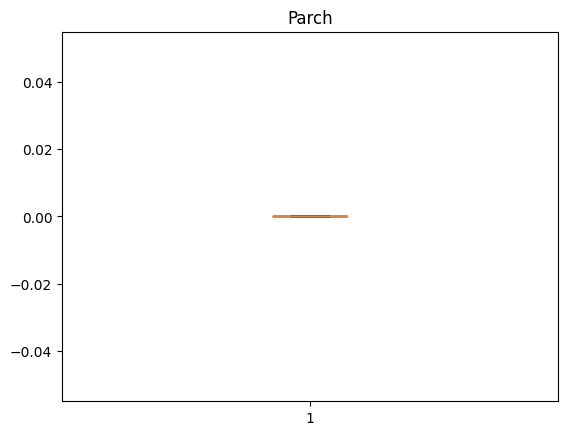

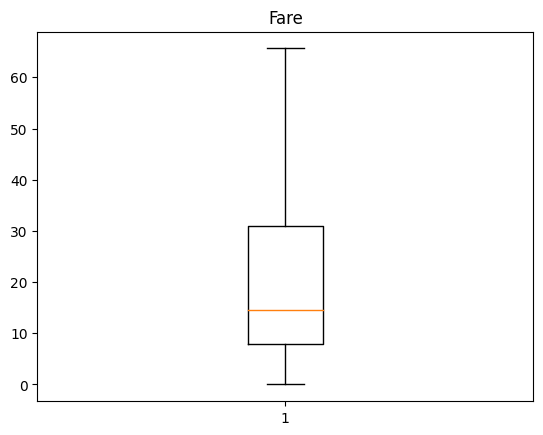

In [29]:
num_columns=data.select_dtypes(include=['float64','int64'])
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


Encode the object data using label encoding.

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1.0,0,7.2500,2
1,1,1,0,38.000000,1.0,0,65.6344,0
2,1,3,0,26.000000,0.0,0,7.9250,2
3,1,1,0,35.000000,1.0,0,53.1000,2
4,0,3,1,35.000000,0.0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.0,0,13.0000,2
887,1,1,0,19.000000,0.0,0,30.0000,2
888,0,3,0,29.699118,1.0,0,23.4500,2
889,1,1,1,26.000000,0.0,0,30.0000,0


Let’s split the data into the target and feature variables.


In [31]:
x = data.drop(columns = ['Survived'],axis=1)
y = data['Survived']


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=.25)

In [33]:
#Do scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)


In [34]:
#Evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

#Logistic Regression Model

In [35]:
#Just making logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100)

In [36]:
log_model = log_reg.fit(x_train,y_train)
y_log_pred = log_model.predict(x_test)


In [37]:
log_acc = accuracy_score(y_test,y_log_pred)
log_acc

0.7892376681614349

# 3. Create kNN and SVM models


#SVM Model

In [52]:
from sklearn.svm import SVC
sv_cl = SVC(kernel='linear')#kernel linear get maximum accuracy
sv_cl.fit(x_train,y_train)
y_pred_svm = sv_cl.predict(x_test)
svm_acc = accuracy_score(y_test,y_pred_svm)
print("Accuracy: ",accuracy_score(y_test,y_pred_svm))

Accuracy:  0.7847533632286996


When we are using data without scaling ,Linear kernel gives maximum accuracy.

In [39]:
from sklearn.svm import SVC
sv_cl = SVC(kernel='rbf')#kernel rbf get maximum accuracy
sv_cl_sc = sv_cl.fit(x_train_scaled,y_train)
y_pred_svm_sc = sv_cl_sc.predict(x_test_scaled)
svm_acc_sc = accuracy_score(y_test,y_pred_svm_sc)
print("Confusion metrics: ",confusion_matrix(y_test,y_pred_svm_sc))
print("Accuracy: ",accuracy_score(y_test,y_pred_svm_sc))
print("Precision: ",precision_score(y_test,y_pred_svm_sc))
print("Recall: ",recall_score(y_test,y_pred_svm_sc))
print("f1 score: ",f1_score(y_test,y_pred_svm_sc))

Confusion metrics:  [[120  14]
 [ 27  62]]
Accuracy:  0.8161434977578476
Precision:  0.8157894736842105
Recall:  0.6966292134831461
f1 score:  0.7515151515151515


When we are using scaled data ,rbf kernel gives maximum accuracy.

#KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)


Data without scaling

In [42]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

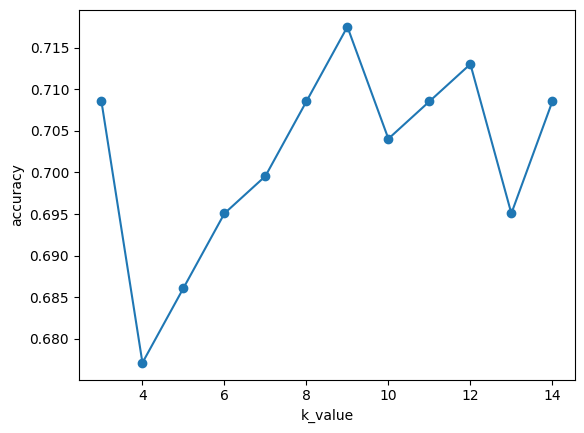

In [43]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [44]:
classifier = KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)
knn_acc = accuracy_score(y_test,y_pred_knn)

print("Accuracy: ",accuracy_score(y_test,y_pred_knn))


Accuracy:  0.7174887892376681


KNN with scaled data

Text(0, 0.5, 'accuracy')

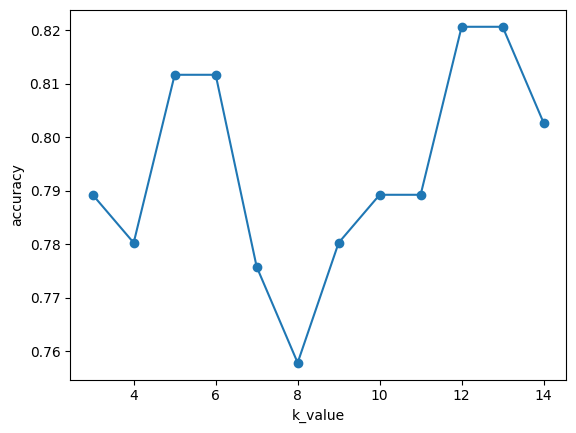

In [45]:
metric_k2 = []
neighbors2 = np.arange(3,15)
for k in neighbors2:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train_scaled,y_train)
  y_pred_knn_sc = classifier.predict(x_test_scaled)
  accuracy= accuracy_score(y_test,y_pred_knn_sc)
  metric_k2.append(accuracy)
plt.plot(neighbors2,metric_k2,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [46]:
classifier = KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2)
knn_sc= classifier.fit(x_train_scaled,y_train)
y_pred_knn_sc = knn_sc.predict(x_test_scaled)
knn_acc_sc = accuracy_score(y_test,y_pred_knn_sc)
print("Confusion metrics: ",confusion_matrix(y_test,y_pred_knn_sc))
print("Accuracy: ",accuracy_score(y_test,y_pred_knn_sc))
print("Precision: ",precision_score(y_test,y_pred_knn_sc))
print("Recall: ",recall_score(y_test,y_pred_knn_sc))
print("f1 score: ",f1_score(y_test,y_pred_knn_sc))


Confusion metrics:  [[120  14]
 [ 26  63]]
Accuracy:  0.820627802690583
Precision:  0.8181818181818182
Recall:  0.7078651685393258
f1 score:  0.7590361445783134


KNN with scaled data gives maximum accuracy.

#4. Do k-fold and stratified k-fold cross validation techniques.


In [47]:
#kfold cross validation
from sklearn.model_selection import KFold
kfold_validator=KFold(10) #no of folds
from sklearn.model_selection import cross_val_score
cv_score_log=cross_val_score(log_model,x,y,cv=kfold_validator)
cv_score_knn=cross_val_score(knn_sc,x,y,cv=kfold_validator)
cv_score_svm=cross_val_score(sv_cl_sc,x,y,cv=kfold_validator)

log_mean = cv_score_log.mean()
knn_mean = cv_score_knn.mean()
svm_mean = cv_score_svm.mean()



In [48]:
#stratified cross validation
from sklearn.model_selection import StratifiedKFold
stratified_cv =StratifiedKFold(n_splits=10)
cv_score_sr_log=cross_val_score(log_model,x,y,cv=stratified_cv)
cv_score_sr_svm=cross_val_score(sv_cl_sc,x,y,cv=stratified_cv)


In [50]:

cv_score_sr_knn=cross_val_score(knn_sc,x,y,cv=stratified_cv)
sr_log_mean = cv_score_sr_log.mean()
sr_svm_mean = cv_score_sr_svm.mean()
sr_knn_mean = cv_score_sr_knn.mean()

In [51]:
result = pd.DataFrame({'Model': ['KNN Model','SVM Model'], 'Accuracy':[knn_acc_sc,svm_acc_sc], 'Cross validation mean score of k-fold':[knn_mean,svm_mean], 'Cross validation mean score ofstratified k-fold':[sr_knn_mean,sr_svm_mean]})
result

,Model,Accuracy,Cross validation mean score of k-fold,Cross validation mean score ofstratified k-fold
0,KNN Model,0.820628,0.715044,0.71166
1,SVM Model,0.816143,0.678052,0.68814


The accuracy of KNN and SVM is around the same, with only slight differences.
* The accuracy of the KNN model is slightly higher than that of the SVM model..
* The CV score and Stratified CV score are also slightly high for KNN.

Here KNN Model is the good prediction model.

